In [1]:
from sdgym import load_dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.gridspec import GridSpec
import seaborn as sns

from pgmpy.models import BayesianModel
from pgmpy.estimators import TreeSearch
from pgmpy.sampling import BayesianModelSampling
from pgmpy.inference import BayesianModelProbability

import xgboost as xgb
from sklearn.neural_network import MLPClassifier
from synthsonic.models.kde_copula_nn_pdf import KDECopulaNNPdf

In [3]:
import xgboost as xgb

In [4]:
plt.rcParams['text.color'] = 'black'
plt.rcParams['figure.max_open_warning'] = 0
colors = [i['color'] for i in plt.rcParams['axes.prop_cycle']]
markers = ['o', 's', 'p', 'x', '^', '+', '*', '<', 'D', 'h', '>']
%matplotlib inline

In [5]:
dataset_name = 'ring'
data, categorical_columns, ordinal_columns = load_dataset(dataset_name)

In [6]:
import logging 

In [7]:
logging.basicConfig(level=logging.INFO)

In [8]:
clf = xgb.XGBClassifier(
    n_estimators=100,
    reg_lambda=1,
    gamma=0,
    max_depth=3
)

In [9]:
#kde = KDECopulaNNPdf(rho=0.2, clf=MLPClassifier(random_state=0, max_iter=1000))
#kde = KDECopulaNNPdf(rho=0.2, clf=clf)
kde = KDECopulaNNPdf(use_KDE=False, n_uniform_bins=100, n_quantiles=1000)
#kde.max_scale_value = 500

In [10]:
kde = kde.fit(data)

INFO:KDECopulaNNPdf:Processing 2 numerical and 0 categorical columns
INFO:KDECopulaNNPdf:Transforming numerical variables.
INFO:KDECopulaNNPdf:Configuring Bayesian Network (cat+num).
INFO:KDECopulaNNPdf:n_uniform_bins = 100
Building tree: : 0it [00:00, ?it/s]
INFO:KDECopulaNNPdf:Configuring classifier.
INFO:KDECopulaNNPdf:Generating 256500 data points.
Generating for node: 0: 100%|██████████| 2/2 [00:00<00:00,  8.43it/s]
INFO:KDECopulaNNPdf:Fitting discriminative learner: selected 2 features.
INFO:KDECopulaNNPdf:Calibrating classifier.
INFO:KDECopulaNNPdf:N_bins = 31
INFO:KDECopulaNNPdf:Maximum weight found: 1.3280254887548673


In [11]:
df = pd.DataFrame(data, columns=['x', 'y'])

Text(36.125, 0.5, '')

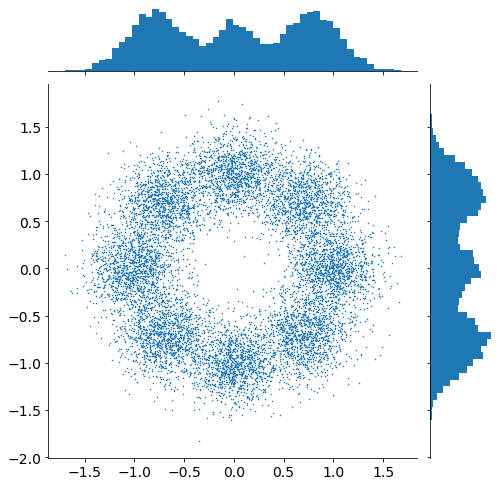

In [12]:
axs = sns.JointGrid(data=df, x='x', y='y', height=7)
axs.ax_joint.scatter(data=df, x='x', y='y', c=colors[0], marker='x', s=0.3)
cnt, bins, _ = axs.ax_marg_x.hist(df['x'], bins=50, color=colors[0])
cnt, bins, _ = axs.ax_marg_y.hist(df['y'], bins=50, color=colors[0], orientation='horizontal')
axs.ax_joint.tick_params(labelsize=14)
axs.ax_joint.set_xlabel('')
axs.ax_joint.set_ylabel('')
#axs.savefig(f'{dataset_name}_joint_marginal_data.pdf', dpi=600)

Text(36.125, 0.5, '')

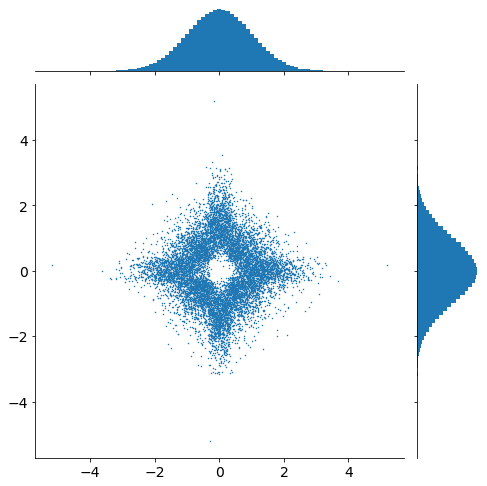

In [13]:
X_g = kde.pipe_[0].transform(data)
tdf = pd.DataFrame(X_g, columns=['x', 'y'])

axs = sns.JointGrid(data=tdf, x='x', y='y', height=7)
axs.ax_joint.scatter(data=tdf, x='x', y='y', c=colors[0], marker='x', s=0.3)
cnt, bins, _ = axs.ax_marg_x.hist(tdf['x'], bins='auto', color=colors[0])
cnt, bins, _ = axs.ax_marg_y.hist(tdf['y'], bins='auto', color=colors[0], orientation='horizontal')
axs.ax_joint.tick_params(labelsize=14)
axs.ax_joint.set_xlabel('')
axs.ax_joint.set_ylabel('')
#axs.savefig(f'{dataset_name}_joint_marginal_quantile.pdf', dpi=600)

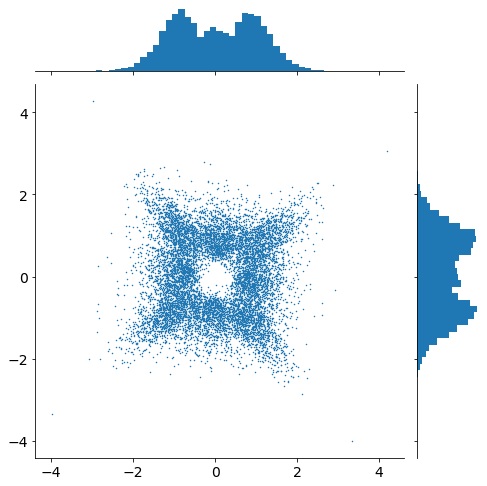

In [14]:
X_p = kde.pipe_[0:2].transform(data)
tdf = pd.DataFrame(X_p, columns=['x', 'y'])

axs = sns.JointGrid(data=tdf, x='x', y='y', height=7)
axs.ax_joint.scatter(data=tdf, x='x', y='y', c=colors[0], marker='x', s=0.3)
cnt, bins, _ = axs.ax_marg_x.hist(tdf['x'], bins='auto', color=colors[0])
cnt, bins, _ = axs.ax_marg_y.hist(tdf['y'], bins='auto', color=colors[0], orientation='horizontal')
axs.ax_joint.tick_params(labelsize=14)
axs.ax_joint.set_xlabel('')
axs.ax_joint.set_ylabel('')
axs.savefig(f'{dataset_name}_joint_marginal_pca.pdf', dpi=600)

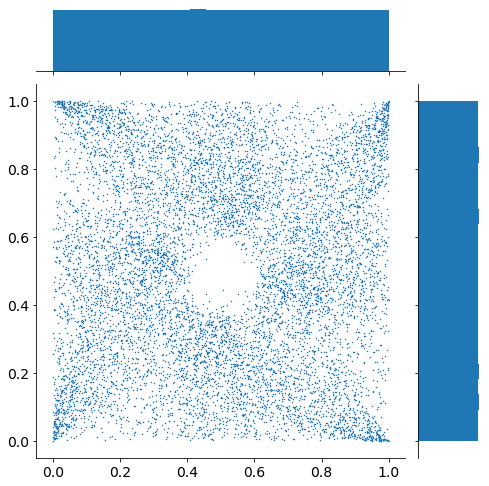

In [15]:
X_u = kde.pipe_.transform(data)
tdf = pd.DataFrame(X_u, columns=['x', 'y'])

axs = sns.JointGrid(data=tdf, x='x', y='y', height=7)
axs.ax_joint.scatter(data=tdf, x='x', y='y', c=colors[0], marker='x', s=0.3)
cnt, bins, _ = axs.ax_marg_x.hist(tdf['x'], bins='auto', color=colors[0])
cnt, bins, _ = axs.ax_marg_y.hist(tdf['y'], bins='auto', color=colors[0], orientation='horizontal')
axs.ax_joint.tick_params(labelsize=14)
axs.ax_joint.set_xlabel('')
axs.ax_joint.set_ylabel('')
axs.savefig(f'{dataset_name}_joint_marginal_uniform.pdf', dpi=600)

In [16]:
# clf=svm
kde.score(data)

-12777.487225184817

In [17]:
df = pd.DataFrame(data, columns=['x', 'y'])

X_gen = kde.sample_no_weights(df.shape[0] * 10)
df_gen = pd.DataFrame(X_gen, columns=['x', 'y']).sample(n=df.shape[0])

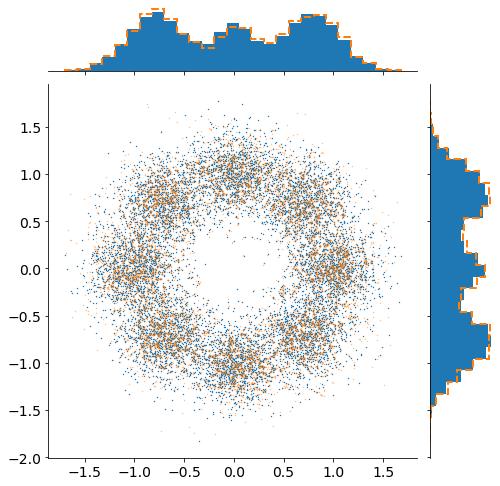

In [18]:
axs = sns.JointGrid(data=df_gen, x='x', y='y', height=7)
axs.ax_joint.scatter(data=df, x='x', y='y', c=colors[0], marker='x', s=0.2)
axs.ax_joint.scatter(data=df_gen, x='x', y='y', c=colors[1], marker='x', s=0.2, alpha=0.5)

cnt, bins, _ = axs.ax_marg_x.hist(df['x'], bins='auto', color=colors[0])
ext_cnt = np.insert(cnt, 0, cnt[0])
centers = 0.5 * (bins[1:] + bins[:-1])
cnt_gen, *_ = axs.ax_marg_x.hist(df_gen['x'], bins=bins, histtype='step', lw=2, color=colors[1], ls='--')

cnt, bins, _ = axs.ax_marg_y.hist(df['y'], bins='auto', color=colors[0], orientation='horizontal')
ext_cnt = np.insert(cnt, 0, cnt[0])
centers = 0.5 * (bins[1:] + bins[:-1])
cnt_gen, *_ = axs.ax_marg_y.hist(df_gen['y'], bins=bins, histtype='step', lw=2, color=colors[1], orientation='horizontal', ls='--')
axs.ax_joint.tick_params(labelsize=14)
axs.ax_joint.set_xlabel('')
axs.ax_joint.set_ylabel('')
axs.savefig(f'{dataset_name}_joint_marginal_with_sample_alt.pdf', dpi=600)

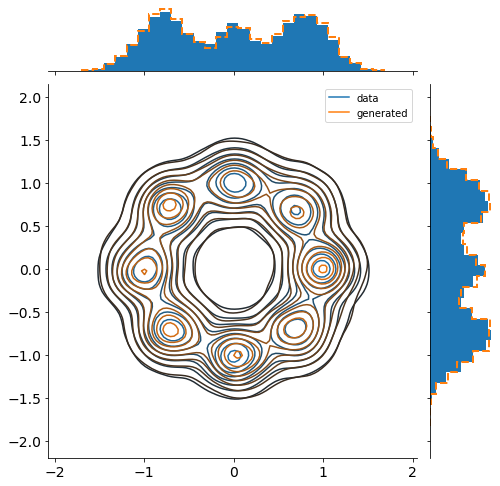

In [19]:
axs = sns.JointGrid(data=df_gen, x='x', y='y', height=7)
sns.kdeplot(data=df['x'], data2=df['y'], color=colors[0], ax=axs.ax_joint, label='data', shade=False, shade_lowest=False)
sns.kdeplot(data=df_gen['x'], data2=df_gen['y'], color=colors[1], ax=axs.ax_joint, label='generated', zorder=10, shade=False, shade_lowest=False)
#axs.ax_joint.scatter(data=df_gen, x='x', y='y', c=colors[1], marker='x', alpha=0.9, s=0.3, label='generated')
axs.ax_joint.set_xlabel('')
axs.ax_joint.set_ylabel('')
axs.ax_joint.legend()

cnt, bins, _ = axs.ax_marg_x.hist(df['x'], bins='auto', color=colors[0], lw=2)
ext_cnt = np.insert(cnt, 0, cnt[0])
centers = 0.5 * (bins[1:] + bins[:-1])
cnt_gen, *_ = axs.ax_marg_x.hist(df_gen['x'], bins=bins, histtype='step', lw=2, color=colors[1], ls='--')

cnt, bins, _ = axs.ax_marg_y.hist(df['y'], bins='auto', color=colors[0], orientation='horizontal')
ext_cnt = np.insert(cnt, 0, cnt[0])
centers = 0.5 * (bins[1:] + bins[:-1])
cnt_gen, *_ = axs.ax_marg_y.hist(df_gen['y'], bins=bins, histtype='step', lw=2, color=colors[1], orientation='horizontal', ls='--')
axs.ax_joint.tick_params(labelsize=14)
axs.savefig(f'{dataset_name}_joint_marginal_with_sample_contours.pdf', dpi=600)

# BN grid_plot

In [20]:
bin_width = 1. / 20
X_num_discrete = np.floor(X_u / bin_width)
X_num_discrete[X_num_discrete >= 20] = 20 - 1  # correct for values at 1.

df_dis = pd.DataFrame(X_num_discrete)
# "tan" bayesian network needs string column names
df_dis.columns = [str(c) for c in df_dis.columns]
est = TreeSearch(df_dis, root_node=df_dis.columns[0])
dag = est.estimate(
    estimator_type="tan",
    class_node='1',
    show_progress=False,
    edge_weights_fn='mutual_info'
)
# model the conditional probabilities
bn = BayesianModel(dag.edges())
bn.fit(df_dis)
bn_prob = BayesianModelProbability(bn)
bn_ordering = [str(i) for i in range(df_dis.shape[1])]


x = np.arange(0, 20, 1)
xx, yy = np.meshgrid(x, x)
X_grid = np.hstack((yy.reshape(400, 1), xx.reshape(400, 1)[::-1]))
P_grid = np.exp(bn_prob.log_probability(X_grid)).reshape(20, 20)
weight_grid = P_grid / ( 1 / 400)

/Users/rurlus/.pyenv/versions/3.8.5/envs/SYNTHSONIC/lib/python3.8/site-packages/pgmpy/inference/bn_inference.py:194: RuntimeWarning: divide by zero encountered in log
  return np.log(probability_node)


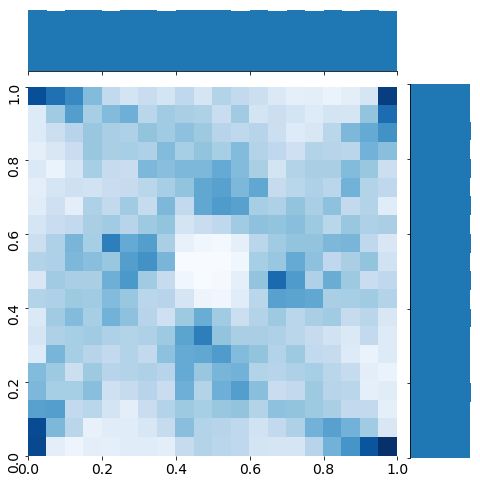

In [21]:
axs = sns.JointGrid(data=tdf, x='x', y='y', height=7)
sns.heatmap(weight_grid, vmin=0, vmax=weight_grid.max(), cmap='Blues', cbar=False, ax=axs.ax_joint)#, annot=weight_grid)
cnt, bins, _ = axs.ax_marg_x.hist(X_num_discrete[:, 0], bins=np.arange(0, 21), color=colors[0])
cnt, bins, _ = axs.ax_marg_y.hist(X_num_discrete[:, 1], bins=np.arange(0, 21), color=colors[0], orientation='horizontal')
axs.ax_joint.tick_params(labelsize=14)
axs.ax_joint.set_xlabel('')
axs.ax_joint.set_ylabel('')
axs.ax_joint.set_aspect("equal")
#axs.ax_joint.locator_params(tight=True, nbins=5)
axs.ax_joint.xaxis.set_major_locator(ticker.MultipleLocator(4))
axs.ax_joint.set_xticklabels([0.0, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
axs.ax_joint.yaxis.set_major_locator(ticker.MultipleLocator(4))
axs.ax_joint.set_yticklabels([1.0, 1.0, 0.8, 0.6, 0.4, 0.2, 0.0])
axs.savefig(f'{dataset_name}_discrete_uniform_bn_weights.pdf', dpi=600)

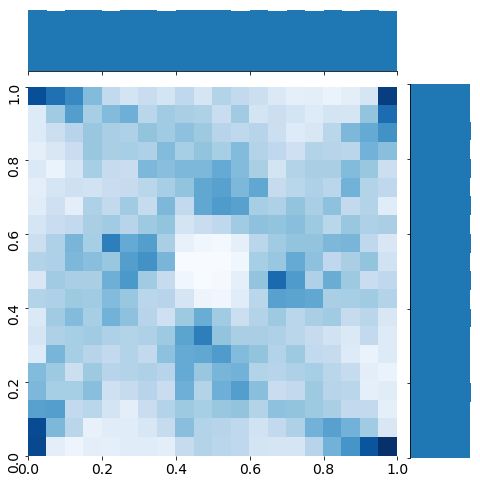

In [22]:
axs = sns.JointGrid(data=tdf, x='x', y='y', height=7)
sns.heatmap(P_grid, vmin=0, vmax=P_grid.max(), cmap='Blues', cbar=False, ax=axs.ax_joint)
cnt, bins, _ = axs.ax_marg_x.hist(X_num_discrete[:, 0], bins=np.arange(0, 21), color=colors[0])
cnt, bins, _ = axs.ax_marg_y.hist(X_num_discrete[:, 1], bins=np.arange(0, 21), color=colors[0], orientation='horizontal')
axs.ax_joint.tick_params(labelsize=14)
axs.ax_joint.set_xlabel('')
axs.ax_joint.set_ylabel('')
axs.ax_joint.set_aspect("equal")
#axs.ax_joint.locator_params(tight=True, nbins=5)
axs.ax_joint.xaxis.set_major_locator(ticker.MultipleLocator(4))
axs.ax_joint.set_xticklabels([0.0, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
axs.ax_joint.yaxis.set_major_locator(ticker.MultipleLocator(4))
axs.ax_joint.set_yticklabels([1.0, 1.0, 0.8, 0.6, 0.4, 0.2, 0.0])
axs.savefig(f'{dataset_name}_discrete_uniform_bn_proba.pdf', dpi=600)

In [23]:
20 ** 2

400

In [24]:
nbins = 10
bin_width = 1. / nbins
X_num_discrete = np.floor(X_u / bin_width)
X_num_discrete[X_num_discrete >= nbins] = nbins - 1  # correct for values at 1.

df_dis = pd.DataFrame(X_num_discrete)
# "tan" bayesian network needs string column names
df_dis.columns = [str(c) for c in df_dis.columns]
est = TreeSearch(df_dis, root_node=df_dis.columns[0])
dag = est.estimate(
    estimator_type="tan",
    class_node='1',
    show_progress=False,
    edge_weights_fn='mutual_info'
)
# model the conditional probabilities
bn = BayesianModel(dag.edges())
bn.fit(df_dis)
bn_prob = BayesianModelProbability(bn)
bn_ordering = [str(i) for i in range(df_dis.shape[1])]


x = np.arange(0, nbins, 1)
xx, yy = np.meshgrid(x, x)
X_grid = np.hstack((yy.reshape(nbins ** 2, 1), xx.reshape(nbins ** 2, 1)[::-1]))
P_grid = np.exp(bn_prob.log_probability(X_grid)).reshape(nbins, nbins)
weight_grid = P_grid / ( 1 / (nbins ** 2))

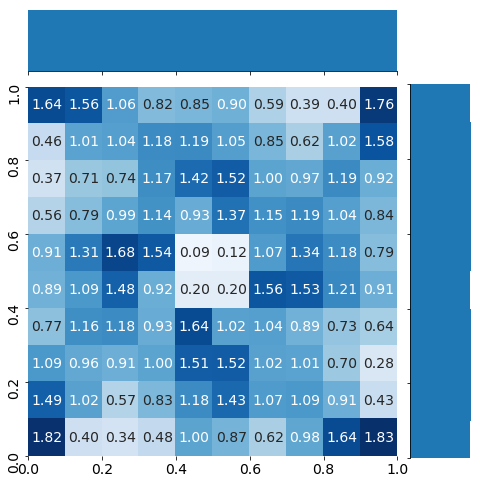

In [59]:
axs = sns.JointGrid(data=tdf, x='x', y='y', height=7)
sns.heatmap(weight_grid, vmin=0, vmax=weight_grid.max(), fmt='.2f', cmap='Blues', cbar=False, ax=axs.ax_joint, annot=weight_grid, annot_kws={'fontsize': 14})
cnt, bins, _ = axs.ax_marg_x.hist(X_num_discrete[:, 0], bins=np.arange(0, nbins + 1), color=colors[0])
cnt, bins, _ = axs.ax_marg_y.hist(X_num_discrete[:, 1], bins=np.arange(0, nbins + 1), color=colors[0], orientation='horizontal')
axs.ax_joint.tick_params(labelsize=14)
axs.ax_joint.set_xlabel('')
axs.ax_joint.set_ylabel('')
axs.ax_joint.set_aspect("equal")
axs.ax_joint.xaxis.set_major_locator(ticker.MultipleLocator(2))
axs.ax_joint.set_xticklabels([0.0, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
axs.ax_joint.yaxis.set_major_locator(ticker.MultipleLocator(2))
axs.ax_joint.set_yticklabels([1.0, 1.0, 0.8, 0.6, 0.4, 0.2, 0.0])
axs.savefig(f'{dataset_name}_discrete_uniform_bn_weights_annotated.pdf', dpi=600)

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   2.,   3.,  11.,
         16.,  30.,  47.,  76., 118., 176., 247., 333., 431., 534., 637.,
        725., 787., 827., 822., 791., 721., 639., 533., 432., 330., 249.,
        175., 116.,  77.,  49.,  27.,  19.,   9.,   6.,   1.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([-5.19933758e+00, -4.99136408e+00, -4.78339058e+00, -4.57541707e+00,
        -4.36744357e+00, -4.15947007e+00, -3.95149656e+00, -3.74352306e+00,
        -3.53554956e+00, -3.32757605e+00, -3.11960255e+00, -2.91162905e+00,
        -2.70365554e+00, -2.49568204e+00, -2.28770854e+00, -2.07973503e+00,
        -1.87176153e+00, -1.66378803e+00, -1.45581452e+00, -1.24784102e+00,
        -1.03986752e+00, -8.31894013e-01, -6.23920510e-01, -4.15947007e-01,
        -2.07973503e-01,  4.89217555e-11,  2.07973503e-01,  4.15947007e-01,
         6.23920510e-01,  8.31894013e-01,  1.03986752e+00,  1.24784102e+00,
         1.45581452e+00,  1.66378803e+00,  1.87176

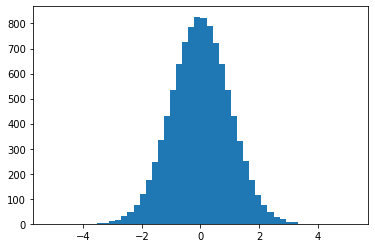

In [26]:
i=0
X_g = kde.pipe_[0].transform(data)
plt.hist(X_g[:, i], bins=50)

In [27]:
kde.pipe_[0:2]

Pipeline(steps=[('kdequantiletransformer-1',
                 KDEQuantileTransformer(mirror_left=array([None, None], dtype=object),
                                        mirror_right=array([None, None], dtype=object),
                                        output_distribution='normal',
                                        rho=array([0.5, 0.5]), use_KDE=False,
                                        x_max=array([2.9266327543233293, 3.017099761765537], dtype=object),
                                        x_min=array([-2.9483644272028595, -3.0676129650659503], dtype=object))),
                ('pca', PCA(n_components=2, random_state=0))])

(array([  1.,   0.,   0.,   0.,   0.,   1.,   5.,   2.,   6.,  14.,  19.,
         42.,  72., 134., 189., 282., 421., 536., 643., 649., 548., 468.,
        373., 449., 471., 412., 390., 461., 606., 604., 586., 525., 392.,
        262., 188., 113.,  57.,  38.,  20.,  11.,   6.,   1.,   1.,   0.,
          1.,   0.,   0.,   0.,   0.,   1.]),
 array([-3.99058233, -3.8267341 , -3.66288587, -3.49903763, -3.3351894 ,
        -3.17134117, -3.00749294, -2.84364471, -2.67979648, -2.51594825,
        -2.35210002, -2.18825179, -2.02440356, -1.86055533, -1.6967071 ,
        -1.53285887, -1.36901064, -1.20516241, -1.04131418, -0.87746594,
        -0.71361771, -0.54976948, -0.38592125, -0.22207302, -0.05822479,
         0.10562344,  0.26947167,  0.4333199 ,  0.59716813,  0.76101636,
         0.92486459,  1.08871282,  1.25256105,  1.41640928,  1.58025751,
         1.74410575,  1.90795398,  2.07180221,  2.23565044,  2.39949867,
         2.5633469 ,  2.72719513,  2.89104336,  3.05489159,  3.21873982,
 

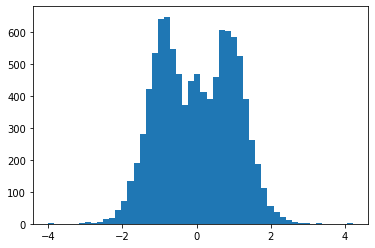

In [28]:
X_p = kde.pipe_[0:2].transform(data)
plt.hist(X_p[:, 0], bins=50)

(array([  1.,   0.,   0.,   1.,   0.,   0.,   1.,   0.,   5.,  11.,  34.,
         52.,  83., 132., 207., 340., 417., 561., 642., 617., 555., 409.,
        409., 459., 425., 438., 414., 533., 615., 625., 610., 485., 342.,
        240., 132.,  96.,  50.,  33.,  10.,  10.,   3.,   1.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([-3.9909363 , -3.8255486 , -3.66016091, -3.49477321, -3.32938552,
        -3.16399783, -2.99861013, -2.83322244, -2.66783474, -2.50244705,
        -2.33705935, -2.17167166, -2.00628396, -1.84089627, -1.67550858,
        -1.51012088, -1.34473319, -1.17934549, -1.0139578 , -0.8485701 ,
        -0.68318241, -0.51779471, -0.35240702, -0.18701933, -0.02163163,
         0.14375606,  0.30914376,  0.47453145,  0.63991915,  0.80530684,
         0.97069454,  1.13608223,  1.30146993,  1.46685762,  1.63224531,
         1.79763301,  1.9630207 ,  2.1284084 ,  2.29379609,  2.45918379,
         2.62457148,  2.78995918,  2.95534687,  3.12073456,  3.28612226,
 

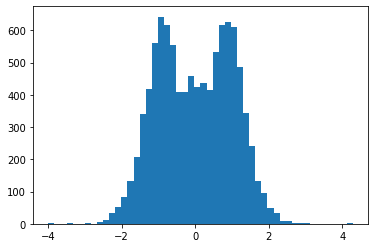

In [29]:
X_p = kde.pipe_[0:2].transform(data)
plt.hist(X_p[:, 1], bins=50)

(array([200., 199., 200., 201., 197., 203., 197., 201., 203., 196., 204.,
        198., 201., 200., 198., 201., 199., 202., 201., 197., 204., 197.,
        199., 203., 200., 198., 201., 201., 197., 202., 201., 199., 201.,
        200., 199., 201., 199., 201., 200., 199., 199., 202., 201., 198.,
        202., 200., 199., 200., 199., 200.]),
 array([1.62100290e-08, 2.00000159e-02, 4.00000155e-02, 6.00000152e-02,
        8.00000148e-02, 1.00000014e-01, 1.20000014e-01, 1.40000014e-01,
        1.60000013e-01, 1.80000013e-01, 2.00000013e-01, 2.20000012e-01,
        2.40000012e-01, 2.60000012e-01, 2.80000011e-01, 3.00000011e-01,
        3.20000011e-01, 3.40000010e-01, 3.60000010e-01, 3.80000010e-01,
        4.00000009e-01, 4.20000009e-01, 4.40000009e-01, 4.60000008e-01,
        4.80000008e-01, 5.00000008e-01, 5.20000007e-01, 5.40000007e-01,
        5.60000007e-01, 5.80000006e-01, 6.00000006e-01, 6.20000005e-01,
        6.40000005e-01, 6.60000005e-01, 6.80000004e-01, 7.00000004e-01,
        7.

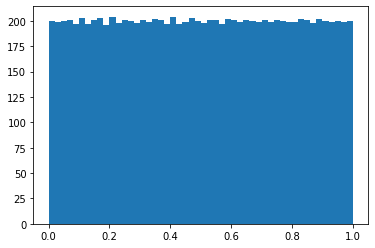

In [30]:
X_u = kde.pipe_.transform(data)
plt.hist(X_u[:, 1], bins=50)

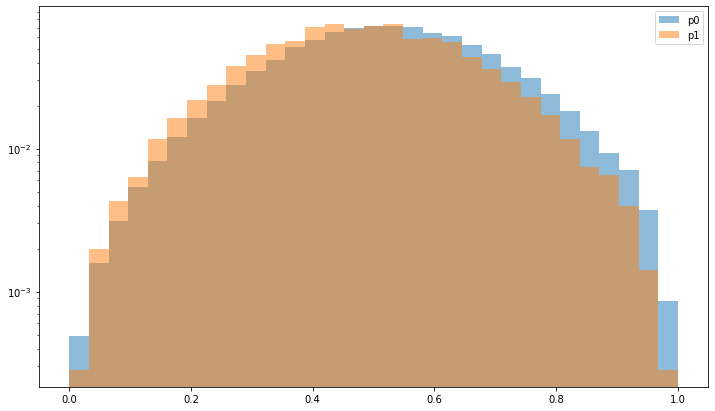

INFO:KDECopulaNNPdf:Maximum weight found: 1.3280254887548673


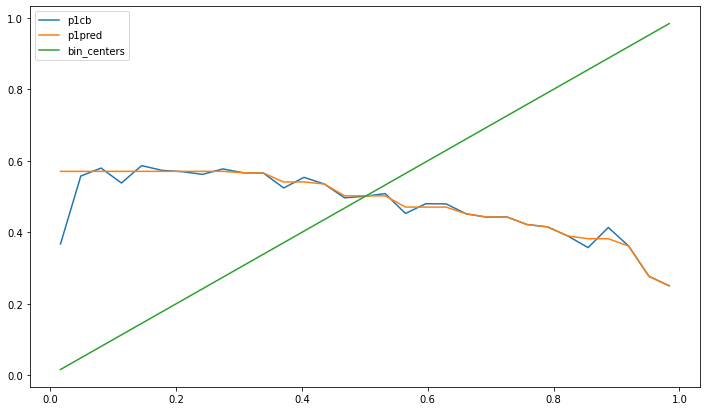

In [31]:
kde._calibrate_classifier(kde.hist_p0_, kde.hist_p1_, kde.bin_edges_, validation_plots=True)

In [32]:
X_gen, sample_weight = kde.sample(200000)

In [33]:
sum(sample_weight)

200232.07648316026

(array([  207.,     0.,   705.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,  1448.,     0.,     0.,  4509.,  3676.,
            0.,     0.,  4753.,  6120.,     0.,     0.,     0., 16585.,
        10706.,     0.,     0., 38986.,     0.,     0.,     0.,     0.,
            0., 43075.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 12986., 21393.,     0.,     0.,     0.,     0.,     0.,
        15289., 19562.]),
 array([0.33377835, 0.3536633 , 0.37354824, 0.39343318, 0.41331813,
        0.43320307, 0.45308802, 0.47297296, 0.4928579 , 0.5127428 ,
        0.53262776, 0.5525127 , 0.57239765, 0.5922826 , 0.61216754,
        0.6320525 , 0.6519374 , 0.67182237, 0.6917073 , 0.71159226,
        0.7314772 , 0.75136214, 0.7712471 , 0.79113203, 0.811017  ,
        0.8309019 , 0.85078686, 0.8706718 , 0.89055675, 0.9104417 ,
        0.93032664, 0.9502116 , 0.9700965 , 0.9899815 , 1.0098664 ,
        1.0297513 , 1.0496362 , 1.0695212 , 1.0894061 , 1.1092911 

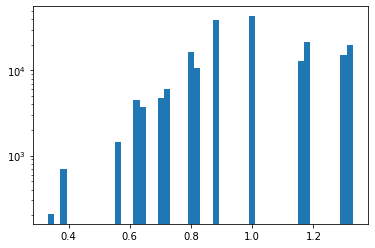

In [34]:
plt.hist(sample_weight, bins=50, log=True)

(array([0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.004, 0.011, 0.031,
        0.096, 0.141, 0.247, 0.337, 0.493, 0.527, 0.564, 0.494, 0.392,
        0.339, 0.259, 0.264, 0.366, 0.454, 0.428, 0.377, 0.284, 0.259,
        0.29 , 0.41 , 0.483, 0.558, 0.549, 0.464, 0.386, 0.227, 0.139,
        0.081, 0.026, 0.015, 0.005, 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ]),
 array([-5. , -4.9, -4.8, -4.7, -4.6, -4.5, -4.4, -4.3, -4.2, -4.1, -4. ,
        -3.9, -3.8, -3.7, -3.6, -3.5, -3.4, -3.3, -3.2, -3.1, -3. , -2.9,
        -2.8, -2.7, -2.6, -2.5, -2.4, -2.3, -2.2, -2.1

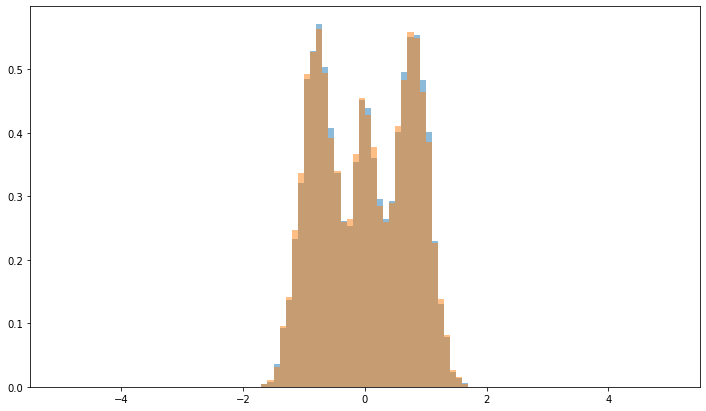

In [35]:
i=0
plt.figure(figsize=(12, 7))
plt.hist(X_gen[:, i], bins=100, range=(-5,5), density=True, alpha=0.5, weights=sample_weight)
plt.hist(data[:, i], bins=100, range=(-5,5), density=True, alpha=0.5)

(array([0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.001, 0.   , 0.001, 0.014, 0.03 ,
        0.071, 0.16 , 0.263, 0.357, 0.474, 0.501, 0.556, 0.494, 0.413,
        0.296, 0.28 , 0.294, 0.39 , 0.48 , 0.453, 0.394, 0.275, 0.285,
        0.297, 0.393, 0.488, 0.522, 0.494, 0.443, 0.373, 0.267, 0.118,
        0.074, 0.026, 0.015, 0.006, 0.002, 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ]),
 array([-5. , -4.9, -4.8, -4.7, -4.6, -4.5, -4.4, -4.3, -4.2, -4.1, -4. ,
        -3.9, -3.8, -3.7, -3.6, -3.5, -3.4, -3.3, -3.2, -3.1, -3. , -2.9,
        -2.8, -2.7, -2.6, -2.5, -2.4, -2.3, -2.2, -2.1

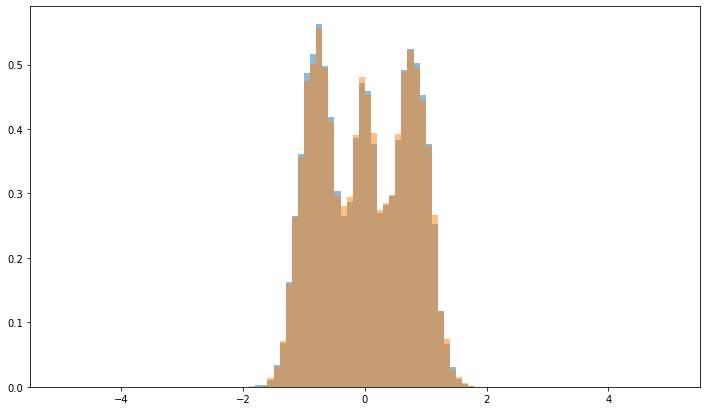

In [36]:
i=1
plt.figure(figsize=(12, 7))
plt.hist(X_gen[:, i], bins=100, range=(-5,5), density=True, alpha=0.5, weights=sample_weight)
plt.hist(data[:, i], bins=100, range=(-5,5), density=True, alpha=0.5)

In [37]:
X_gen, sample_weight = kde.sample(data.shape[0])

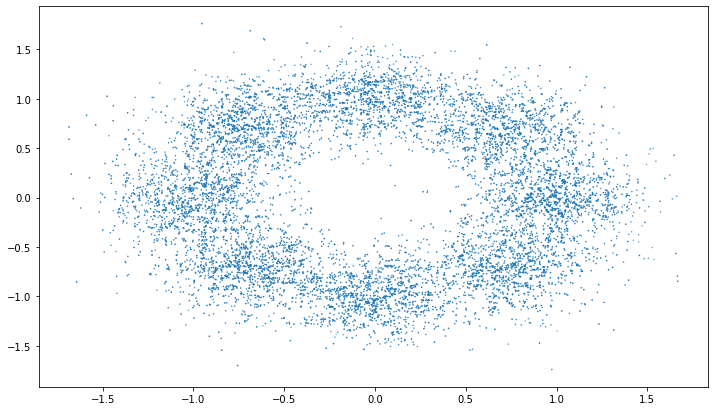

In [38]:
i=0
j=1
plt.figure(figsize=(12,7))
plt.scatter(X_gen[:,i], X_gen[:,j], s=0.3*sample_weight)

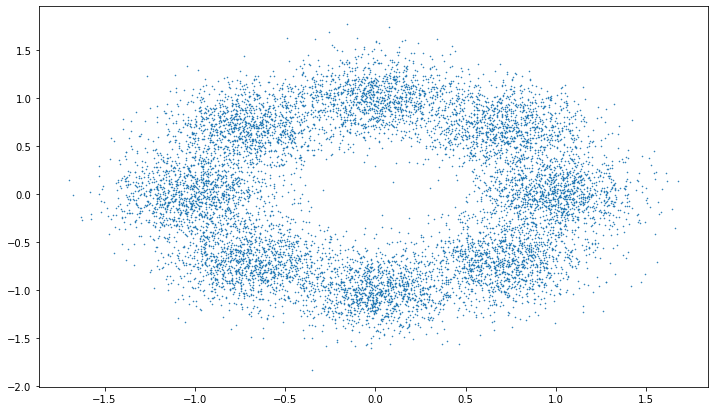

In [39]:
i=0
j=1
plt.figure(figsize=(12,7))
plt.scatter(data[:,i], data[:,j], s=0.3)

In [40]:
X_gen = kde.sample_no_weights(200000)

In [41]:
len (X_gen)

198376

(array([0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.004, 0.011, 0.031,
        0.096, 0.141, 0.247, 0.337, 0.493, 0.527, 0.564, 0.494, 0.392,
        0.339, 0.259, 0.264, 0.366, 0.454, 0.428, 0.377, 0.284, 0.259,
        0.29 , 0.41 , 0.483, 0.558, 0.549, 0.464, 0.386, 0.227, 0.139,
        0.081, 0.026, 0.015, 0.005, 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ]),
 array([-5. , -4.9, -4.8, -4.7, -4.6, -4.5, -4.4, -4.3, -4.2, -4.1, -4. ,
        -3.9, -3.8, -3.7, -3.6, -3.5, -3.4, -3.3, -3.2, -3.1, -3. , -2.9,
        -2.8, -2.7, -2.6, -2.5, -2.4, -2.3, -2.2, -2.1

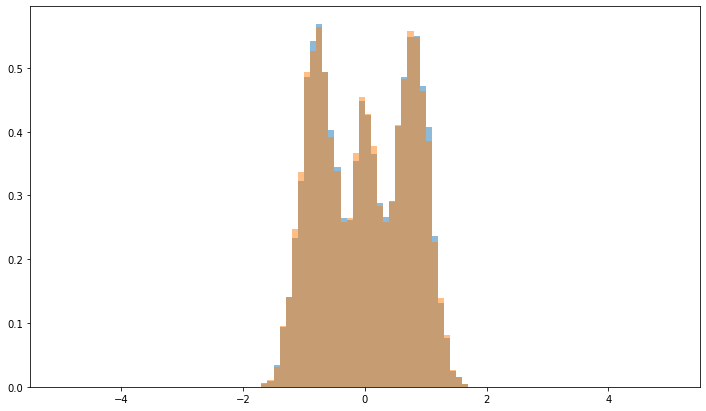

In [42]:
i=0
plt.figure(figsize=(12, 7))
plt.hist(X_gen[:, i], bins=100, range=(-5,5), density=True, alpha=0.5)
plt.hist(data[:, i], bins=100, range=(-5,5), density=True, alpha=0.5)

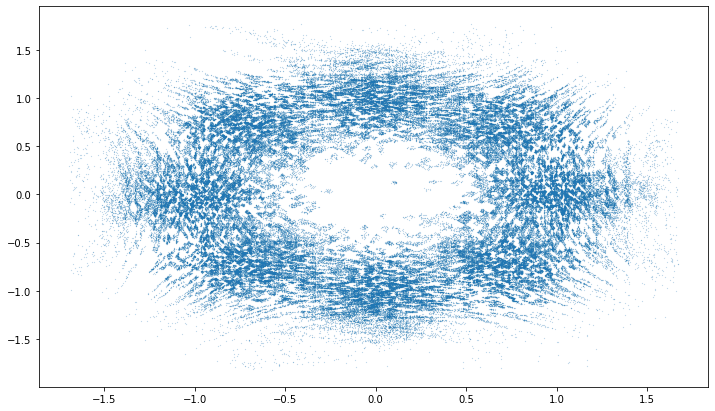

In [43]:
i=0
j=1
plt.figure(figsize=(12,7))
plt.scatter(X_gen[:,i], X_gen[:,j], s=0.01)

## run sdgym

In [44]:
import sdgym

In [45]:
def KDECopulaNNPdf_Synthesizer(real_data, categorical_columns, ordinal_columns):
    # assert len(categorical_columns + ordinal_columns) <= 1

    all_features = list(range(real_data.shape[1]))
    numerical_features = list(set(all_features) - set(categorical_columns + ordinal_columns))
    data = np.float64(real_data)
    
    n_samples = data.shape[0]
    n_features = data.shape[1]
    
    clf = xgb.XGBClassifier(
        n_estimators=250,
        reg_lambda=1,
        gamma=0,
        max_depth=9
    )
#     clf = MLPClassifier(alpha=0.1, random_state=0, max_iter=1000, early_stopping=True)
    
    kde = KDECopulaNNPdf(
        use_KDE=False, 
        distinct_threshold=-1,
        n_uniform_bins=50,
    )
    kde = kde.fit(data)
    
    X_gen = kde.sample_no_weights(n_samples, show_progress=True)    
    X_gen = np.float32(X_gen)
    
    print(X_gen[:, :5])

    return X_gen

In [46]:
from sdgym.synthesizers import (
    CLBNSynthesizer, CTGANSynthesizer, IdentitySynthesizer, IndependentSynthesizer,
    MedganSynthesizer, PrivBNSynthesizer, TableganSynthesizer, TVAESynthesizer,
    UniformSynthesizer, VEEGANSynthesizer, CopulaGAN)

all_synthesizers = [
#    IdentitySynthesizer,
#     IndependentSynthesizer,
     KDECopulaNNPdf_Synthesizer,
#    CopulaGAN
#     KDECopulaNNPdf_SynthesizerInteger,
]

In [47]:
scores = sdgym.run(synthesizers=all_synthesizers, datasets=[dataset_name], iterations=1)

INFO:sdgym.benchmark:0%|          | 0/1 [00:00<?, ?it/s]
INFO:sdgym.benchmark:Evaluating KDECopulaNNPdf_Synthesizer on dataset ring; iteration 0; 362.33 MB
INFO:sdgym.data:Loading dataset ring
INFO:sdgym.benchmark:Running KDECopulaNNPdf_Synthesizer on dataset ring; iteration 0; 362.66 MB
INFO:KDECopulaNNPdf:Processing 2 numerical and 0 categorical columns
INFO:KDECopulaNNPdf:Transforming numerical variables.
INFO:KDECopulaNNPdf:Configuring Bayesian Network (cat+num).
INFO:KDECopulaNNPdf:n_uniform_bins = 50

0it [00:00, ?it/s]
Building tree: : 0it [00:00, ?it/s]
INFO:KDECopulaNNPdf:Configuring classifier.
INFO:KDECopulaNNPdf:Generating 256500 data points.

Generating for node: 0: 100%|██████████| 2/2 [00:00<00:00, 10.70it/s]
INFO:KDECopulaNNPdf:Fitting discriminative learner: selected 2 features.
INFO:KDECopulaNNPdf:Calibrating classifier.
INFO:KDECopulaNNPdf:N_bins = 33
INFO:KDECopulaNNPdf:Maximum weight found: 1.180787093213442
INFO:KDECopulaNNPdf:Generating 12535 data points.

Genera

[[-0.03251266  0.6151961 ]
 [ 1.025728   -0.10957775]
 [ 0.2795848   1.0679258 ]
 ...
 [-0.71395856 -0.5946219 ]
 [-0.9122333  -0.04539723]
 [-0.8478527  -0.49129006]]


INFO:sdgym.benchmark:Finished KDECopulaNNPdf_Synthesizer on dataset ring; iteration 0; 371.61 MB
INFO:sdgym.benchmark:100%|##########| 1/1 [00:04<00:00,  4.12s/it]


In [48]:
scores

,ring/syn_likelihood,ring/test_likelihood,timestamp
VEEGANSynthesizer,-16.830634,-6.354960,2020-04-12 09:41:35.096775
CLBNSynthesizer,-1.765073,-47.157936,2020-10-17 09:46:54.494331
CTGAN,-6.591324,-2.665281,2020-10-17 09:46:54.494331
CTGANSynthesizer,-7.130586,-2.704076,2020-10-17 09:46:54.494331
CopulaGAN,-6.206166,-2.800043,2020-10-17 09:46:54.494331
GaussianCopulaCategorical,-3.196912,-2.150930,2020-10-17 09:46:54.494331
GaussianCopulaCategoricalFuzzy,-3.179001,-2.154148,2020-10-17 09:46:54.494331
GaussianCopulaOneHot,-3.207624,-2.154493,2020-10-17 09:46:54.494331
IdentitySynthesizer,-1.711104,-1.703451,2020-10-17 09:46:54.494331
IndependentSynthesizer,-2.466013,-1.957090,2020-10-17 09:46:54.494331
